In [1]:
pip install surprise

In [2]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNBasic, KNNBaseline
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [3]:
#Load Movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

In [4]:
#Variables for algorithms
algo_svd = SVD()
algo_svdpp = SVDpp()
algo_nmf = NMF()
algo_knnbasic = KNNBasic()
algo_knnbaseline = KNNBaseline()

In [5]:
#Cross-validation
cv_svd = cross_validate(algo_svd, data, measures=["rmse"], cv=4, verbose=True)
cv_svdpp = cross_validate(algo_svdpp, data, measures=["rmse"], cv=4, verbose=True)
cv_nmf = cross_validate(algo_nmf, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbasic = cross_validate(algo_knnbasic, data, measures=["rmse"], cv=4, verbose=True)
cv_knnbaseline = cross_validate(algo_knnbaseline, data, measures=["rmse"], cv=4, verbose=True)

Evaluating RMSE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9337  0.9424  0.9328  0.9481  0.9393  0.0063  
Fit time          1.57    1.62    3.28    3.04    2.38    0.79    
Test time         0.27    0.43    0.89    0.41    0.50    0.23    
Evaluating RMSE of algorithm SVDpp on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9176  0.9264  0.9191  0.9230  0.9215  0.0035  
Fit time          26.47   23.49   23.60   24.63   24.55   1.20    
Test time         5.46    6.22    5.23    6.07    5.74    0.41    
Evaluating RMSE of algorithm NMF on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9626  0.9681  0.9665  0.9710  0.9671  0.0030  
Fit time          2.05    2.04    2.02    2.04    2.04    0.01    
Test time         0.24    0.13    0.20    0.23    0.20    0.04    
Computing the msd similarity matrix...
Done com

In [6]:
#Find mean of RMSE
rmse_svd = cv_svd['test_rmse'].mean()
rmse_svdpp = cv_svdpp['test_rmse'].mean()
rmse_nmf = cv_nmf['test_rmse'].mean()
rmse_knnbasic = cv_knnbasic['test_rmse'].mean()
rmse_knnbaseline = cv_knnbaseline['test_rmse'].mean()

print(f"SVD = {rmse_svd}")
print(f"SVDpp = {rmse_svdpp}")
print(f"NMF = {rmse_nmf}")
print(f"KNNBasic = {rmse_knnbasic}")
print(f"KNNBaseline = {rmse_knnbaseline}")

SVD = 0.9392550798823808
SVDpp = 0.9214994416492217
NMF = 0.9670572342627
KNNBasic = 0.9823084331770058
KNNBaseline = 0.9321385158226478


# **Conclusion:** Among all five means of the results the lowest RMSE has SVDpp, that means this algorithm is the most optimal for Movielens dataset.

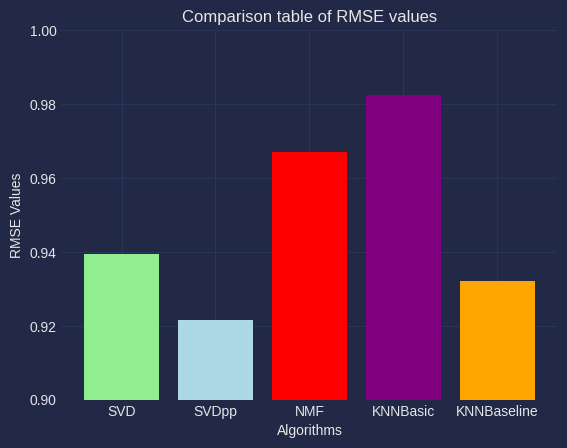

In [7]:
rmse_variables = [rmse_svd, rmse_svdpp, rmse_nmf, rmse_knnbasic, rmse_knnbaseline]
algos = ["SVD", "SVDpp", "NMF", "KNNBasic", "KNNBaseline"]
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.bar(algos, rmse_variables, color=['lightgreen', 'lightblue', 'red', 'purple', 'orange'])
plt.title("Comparison table of RMSE values")
plt.xlabel("Algorithms")
plt.ylabel("RMSE Values")
plt.ylim(0.9, 1.0)
plt.show()

# **Висновок:** на лабораторній роботі я навчився завантажувати датасети та алгоритми, дізнався багато нового про модулі датасетів та алгоритмів, а також знаходив середньоквадратичну похибку встановлених алгоритмів.